In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

sns.set_theme()

data = pd.read_csv("ex2data2.txt", names=['test1', 'test2', 'result'])
data.describe()

,test1,test2,result
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


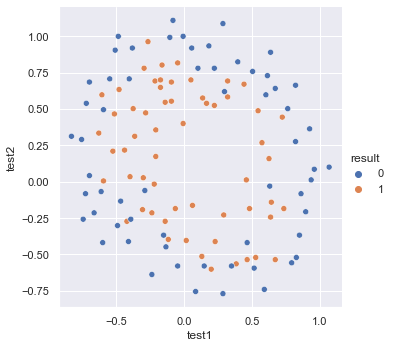

In [2]:
sns.relplot(data=data, x="test1", y="test2", hue="result")

In [8]:
X1 = data.test1
X2 = data.test2
Y = data.result

# map features z = (1.0, X1, X2, X1^2, X2^2, X1X2, X1^3, X1^2X2, X1X2^2, ..., X2^6) n*28 dimension 

X = np.ndarray((len(Y), 28), dtype=np.float64)
X[:, 0] = 1.0
index = 1
for i in range(1, 7):
    for j in range(i + 1):
        print("X1 power ", j, " X2 power", i - j)
        X[:, index] = np.power(X1, j) * np.power(X2, i - j)
        index += 1
print(X.shape)
print(X[0][:10])

X1 power  0  X2 power 1
X1 power  1  X2 power 0
X1 power  0  X2 power 2
X1 power  1  X2 power 1
X1 power  2  X2 power 0
X1 power  0  X2 power 3
X1 power  1  X2 power 2
X1 power  2  X2 power 1
X1 power  3  X2 power 0
X1 power  0  X2 power 4
X1 power  1  X2 power 3
X1 power  2  X2 power 2
X1 power  3  X2 power 1
X1 power  4  X2 power 0
X1 power  0  X2 power 5
X1 power  1  X2 power 4
X1 power  2  X2 power 3
X1 power  3  X2 power 2
X1 power  4  X2 power 1
X1 power  5  X2 power 0
X1 power  0  X2 power 6
X1 power  1  X2 power 5
X1 power  2  X2 power 4
X1 power  3  X2 power 3
X1 power  4  X2 power 2
X1 power  5  X2 power 1
X1 power  6  X2 power 0
(118, 28)
[1.00000000e+00 6.99560000e-01 5.12670000e-02 4.89384194e-01
 3.58643425e-02 2.62830529e-03 3.42353606e-01 2.50892595e-02
 1.83865725e-03 1.34745327e-04]


In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def cost_function(theta, lamb):
    # regularized logistic regression
    ux = X @ theta
    predict = sigmoid(ux)
    total_cost = -Y * np.log(predict) - (1 - Y) * np.log(1 - predict)
    size = len(Y)
    return np.sum(total_cost) / size + lamb * np.sum(theta * theta) / (2 * size)


def gradient(theta, lamb):
    ux = X @ theta
    predict = sigmoid(ux)
    predict_delta = predict - Y
    size = len(Y)
    result = np.ones((len(theta),))
    for i in range(len(theta)):
        result[i] = np.sum(predict_delta * X[:, i]) / size + lamb*theta[i] / size
    
    return result


test_theta = np.ones((X.shape[1],))
test_theta
lamb = 0.1

# ux = X @ test_theta
# predict = sigmoid(ux)
print(cost_function(test_theta, lamb))
print(gradient(test_theta, lamb))

2.032305941784501
[0.34689253 0.11089745 0.07745361 0.16048727 0.00828737 0.14296448
 0.09957015 0.01841609 0.02454341 0.05949382 0.11605064 0.001945
 0.03432945 0.00335721 0.08963173 0.09095411 0.00750327 0.01589954
 0.00966611 0.01107697 0.05132822 0.09838492 0.00060367 0.01800836
 0.00142121 0.01507855 0.00288735 0.06565611]


[ 1.53593502  1.51520719  0.75848283 -1.76299011 -1.63506083 -2.71772643
 -0.17778773 -0.40873071 -0.42776208  0.30481177 -1.56091076 -0.25198267
 -0.51101177  0.08940613 -1.92398576 -0.56709284 -0.15071043 -0.01194981
  0.32912717  0.01048317 -0.1390162  -1.23592041  0.09925294 -0.00931549
  0.44082216  0.05495262  0.39058517 -1.29059469]


<AxesSubplot:>

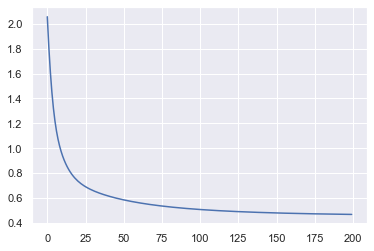

In [18]:
# logistic regression
theta = np.ones((X.shape[1],))
alpha = 1.0
lamb = 0.3
costs = []

for i in range(200):
    cost = cost_function(theta, lamb)
    g = gradient(theta, lamb)
    theta = theta - alpha * g
    costs.append(cost)

print(theta)
# plot costs
sns.lineplot(data=costs)

In [19]:
Y_hat = sigmoid(X @ theta)
data["predict"] = Y_hat
data["predict"] = data["predict"] >= 0.5
data["predict"] = data["predict"].astype(int)
data.head()

,test1,test2,result,predict
0,0.051267,0.69956,1,1
1,-0.092742,0.68494,1,1
2,-0.213710,0.69225,1,1
3,-0.375000,0.50219,1,1
4,-0.513250,0.46564,1,1


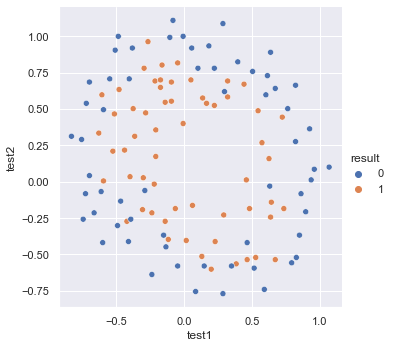

In [20]:
sns.relplot(data=data, x="test1", y="test2", hue="result")

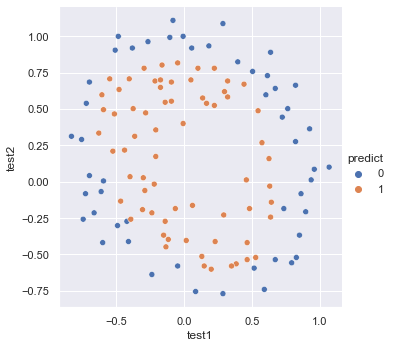

In [21]:
sns.relplot(data=data, x="test1", y="test2", hue="predict")